In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('Airline_data.csv')
df.head()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0


In [3]:
df.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5715.800000
std,3.02765,4.709329,252.389228,1117.767795
min,1976.00000,16.000000,223.000000,3863.000000
25%,1978.25000,21.250000,570.500000,5140.500000
50%,1980.50000,23.000000,759.000000,5845.500000
75%,1982.75000,25.750000,812.750000,6175.500000
max,1985.00000,31.000000,1066.000000,7433.000000


In [4]:
df['miles_flown_x_10^11'] = df['Miles flown [100 mln miles]'].apply(lambda x: x/1000)
df['miles_flown_x_10^11'] = df['miles_flown_x_10^11'].apply(lambda x: x-np.mean(df['miles_flown_x_10^11']))
df

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles],miles_flown_x_10^11
0,1976,24,734,3863.0,-1.8528
1,1977,25,516,4300.0,-1.4158
2,1978,31,754,5027.0,-0.6888
3,1979,31,877,5481.0,-0.2348
4,1980,22,814,5814.0,0.0982
5,1981,21,362,6033.0,0.3172
6,1982,26,764,5877.0,0.1612
7,1983,20,809,6223.0,0.5072
8,1984,16,223,7433.0,1.7172
9,1985,22,1066,7107.0,1.3912


In [5]:
np.mean(df['Fatal accidents'])

23.8

## PRIOR

In [6]:
model_1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/lab5/code_1.stan to exe file /home/lab5/code_1
INFO:cmdstanpy:compiled model executable: /home/lab5/code_1


In [7]:
sim = model_1.sample(iter_sampling=1000,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020, refresh=1000)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [8]:
df_1 = sim.draws_pd()

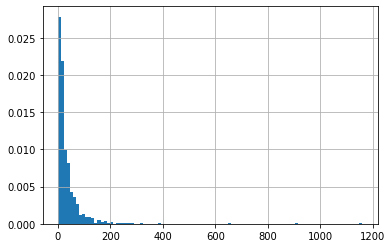

In [9]:
df_1['y_pred'].hist(density=True, bins=100)
plt.show()

In [10]:
np.mean(df_1['y_pred'])

35.767

## POSTERIOR

In [11]:
model_2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file /home/lab5/code_2.stan to exe file /home/lab5/code_2
INFO:cmdstanpy:compiled model executable: /home/lab5/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/code_2.hpp /home/lab5/code_2.stan
Warning in '/home/lab5/code_2.stan', line 4, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code_2.stan', line 13, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code_2.stan', line 30, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
  

In [12]:
sim = model_2.sample(data={'N': len(df), 'n_i': df['miles_flown_x_10^11'].values, 'y': df['Fatal accidents'].values}, seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [13]:
df_2 = sim.draws_pd()
df_2.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,499.790,1.000000,0.80733,2.0,3.0,0.0,-497.809,2.97977,-0.002690,19.7816,...,18.0,26.0,21.0,17.0,12.0,18.0,17.0,24.0,18.0,27.0
1,503.295,1.000000,0.80733,2.0,3.0,0.0,-498.776,3.06516,0.090041,18.1439,...,14.0,26.0,12.0,24.0,14.0,23.0,26.0,21.0,30.0,19.0
2,502.907,0.976519,0.80733,2.0,3.0,0.0,-502.715,3.04614,0.072326,18.3960,...,22.0,23.0,17.0,16.0,27.0,25.0,26.0,20.0,25.0,18.0
3,501.847,0.952957,0.80733,2.0,3.0,0.0,-501.617,3.01788,0.105152,16.8281,...,22.0,29.0,11.0,19.0,19.0,23.0,26.0,16.0,23.0,31.0
4,501.722,0.975609,0.80733,1.0,1.0,0.0,-501.314,3.01201,0.098866,16.9257,...,16.0,25.0,19.0,18.0,27.0,16.0,24.0,13.0,22.0,26.0


In [14]:
years = df['Year'].values
ys = df_2.loc[:, 'y_pred[1]':'y_pred[10]']

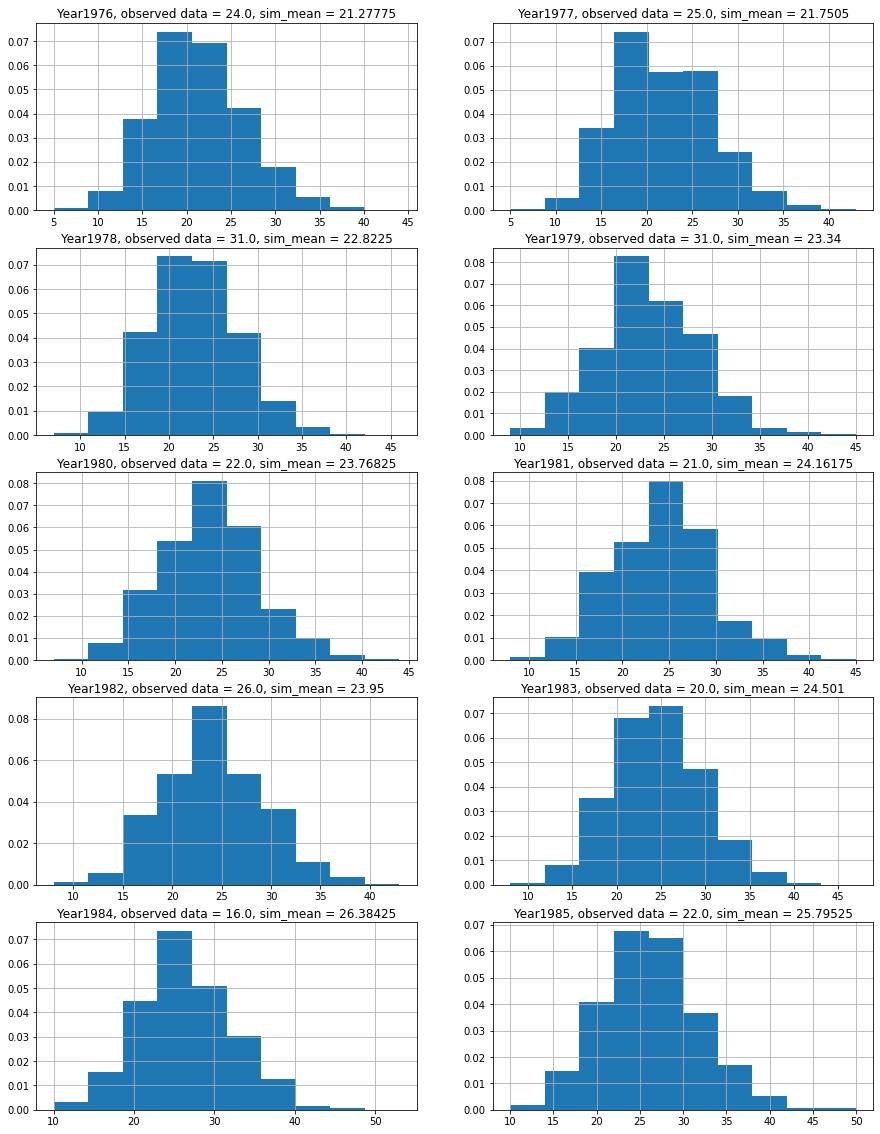

In [15]:
for n, year in enumerate(years):
    plt.subplot(5, 2, n+1)
    df_2[f'y_pred[{n+1}]'].hist(density=True)
    sim_mean = np.mean(df_2[f'y_pred[{n+1}]'])
    plt.title(f"Year{year}, observed data = {df.iloc[n]['Fatal accidents']}, sim_mean = {sim_mean}")
fig = plt.gcf()
fig.set_size_inches(15, 20)
plt.show()

## Individual intercept for each year

In [16]:
model_3 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:compiling stan file /home/lab5/code_3.stan to exe file /home/lab5/code_3
INFO:cmdstanpy:compiled model executable: /home/lab5/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/code_3.hpp /home/lab5/code_3.stan
Warning in '/home/lab5/code_3.stan', line 4, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code_3.stan', line 8, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code_3.stan', line 13, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
   

In [17]:
sim = model_3.sample(data={'N': len(df), 'n_i': df['miles_flown_x_10^11'].values, 'y': df['Fatal accidents'].values}, seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [18]:
df_3 = sim.draws_pd()
df_3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,513.900,0.938764,0.456645,3.0,7.0,0.0,-502.520,3.85830,3.80067,3.61103,...,27.0,19.0,27.0,23.0,31.0,15.0,29.0,17.0,20.0,34.0
1,513.702,0.984973,0.456645,3.0,7.0,0.0,-509.770,4.06002,3.80343,3.45199,...,30.0,38.0,24.0,25.0,25.0,24.0,31.0,10.0,12.0,23.0
2,512.650,0.964514,0.456645,3.0,7.0,0.0,-508.453,3.72586,3.69077,3.47674,...,19.0,18.0,28.0,36.0,28.0,17.0,21.0,23.0,20.0,23.0
3,512.533,0.943210,0.456645,3.0,7.0,0.0,-503.994,3.80498,3.63099,3.72700,...,29.0,23.0,22.0,44.0,18.0,36.0,39.0,8.0,18.0,24.0
4,512.227,0.847564,0.456645,3.0,7.0,0.0,-505.452,4.20025,4.00099,3.58334,...,39.0,27.0,26.0,31.0,21.0,26.0,22.0,28.0,19.0,18.0


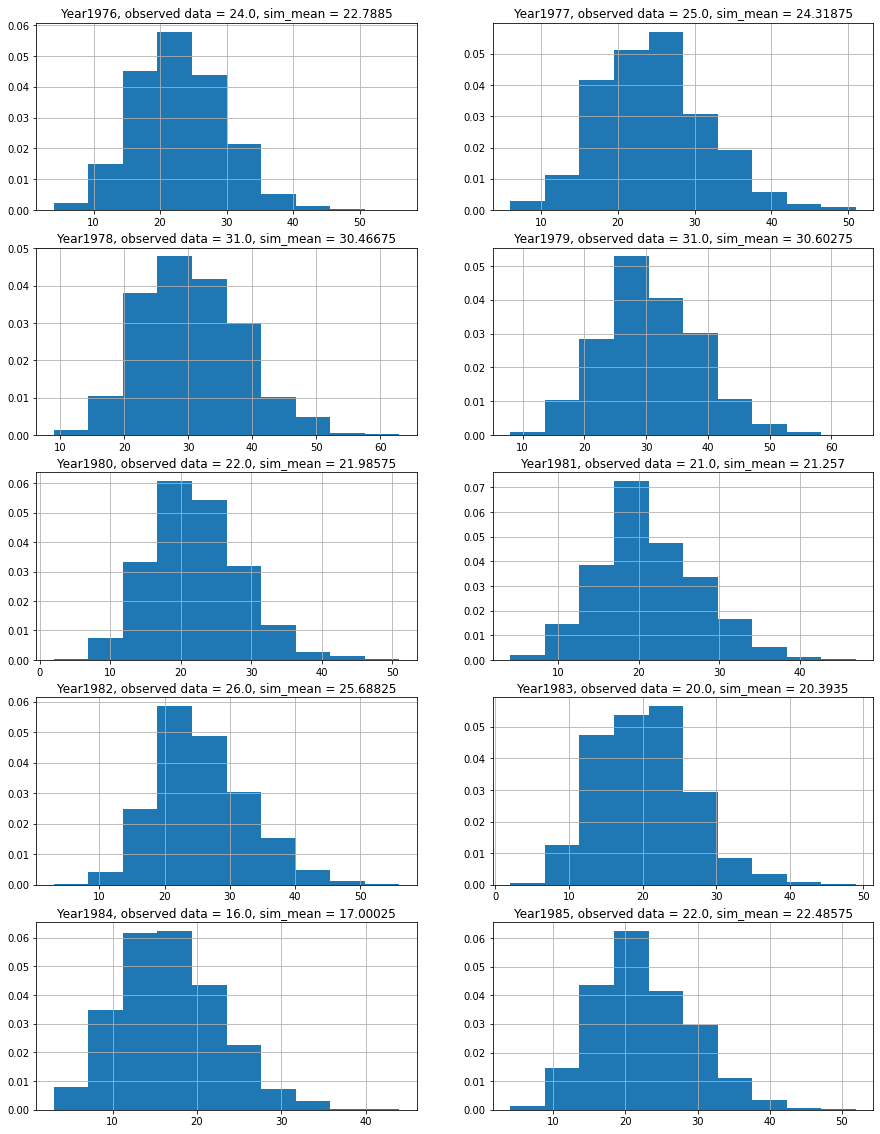

In [19]:
for n, year in enumerate(years):
    plt.subplot(5, 2, n+1)
    df_3[f'y_pred[{n+1}]'].hist(density=True)
    sim_mean = np.mean(df_3[f'y_pred[{n+1}]'])
    plt.title(f"Year{year}, observed data = {df.iloc[n]['Fatal accidents']}, sim_mean = {sim_mean}")
fig = plt.gcf()
fig.set_size_inches(15, 20)
plt.show()